In [1]:
import xarray as xr
import matplotlib
import pandas as pd
import numpy as np
import proplot as plot
import math

In [2]:
def region_mean(var,latmin,latmax):
    weight=[]
    pi = math.pi
    s = np.arange(latmin,latmax+1, 1.0)
    for i in s:
        i = math.cos(i*pi/180.0)
        weight.append(i)
    try:
        weights = xr.DataArray(weight,dims=('latitude'))
        k = var.mean('longitude')
        weighted_prec = k.weighted(weights)
        final = weighted_prec.mean(dim="latitude")
    except:
        weights = xr.DataArray(weight,dims=('lat'))
        k = var.mean('lon')
        weighted_prec = k.weighted(weights)
        final = weighted_prec.mean(dim="lat")
    return final

In [3]:
data = xr.open_dataset('D:/ENSO_salinity/data/sea_level/sea_level_calculate/halosteric_sea_level_2000_anomaly_m.nc')
halo = data.salinity
halo = halo*1000
halo = region_mean(halo,-89.5,89.5)
halo['time'] = np.arange(1980,2019,0.0833333333333333333333333333)

In [4]:
data = xr.open_dataset('D:/ENSO_salinity/data/sea_level/sea_level_calculate/thermosteric_sea_level_2000_anomaly_m.nc')
therm = data.__xarray_dataarray_variable__
therm = therm*1000
therm = region_mean(therm,-89.5,89.5)
therm['time'] = np.arange(1980,2019,0.0833333333333333333333333333)

In [5]:
data = xr.open_dataset('D:/ENSO_salinity/data/sea_level/sea_level_calculate/steric_sea_level_2000_anomaly_m.nc')
steric = data.__xarray_dataarray_variable__
steric = steric*1000
steric = region_mean(steric,-89.5,89.5)
steric['time'] = np.arange(1980,2019,0.0833333333333333333333333333)

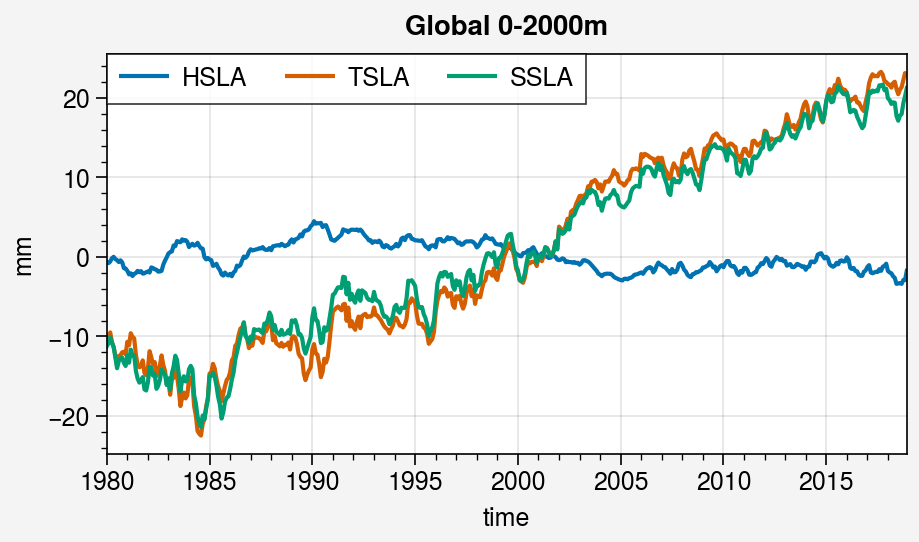

In [10]:
fig = plot.figure(suptitle='Global 0-2000m',refwidth=4,pad=3,refaspect=(2,1))
ax = fig.subplot(xlabel='time', ylabel='mm',xticks=5)
ax.plot(halo,label='HSLA')
ax.plot(therm,label='TSLA')
ax.plot(steric,label='SSLA')
ax.legend()
fig.savefig('D:/steric_sea_level/fig/Global_0-2000m_steric_sea_level.pdf',dpi=600,format='pdf')